In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from scipy.integrate import odeint
from scipy.optimize import least_squares
from scipy import optimize
from datetime import date, timedelta
import random

state_dic={'AC': 'Acre',
 'AL': 'Alagoas',
 'AP': 'Amapá',
 'AM': 'Amazonas',
 'BA': 'Bahia',
 'CE': 'Ceará',
 'DF': 'Federal District',
 'ES': 'Espírito Santo',
 'GO': 'Goiás',
 'MA': 'Maranhão',
 'MT': 'Mato Grosso',
 'MS': 'Mato Grosso do Sul',
 'MG': 'Minas Gerais',
 'PA': 'Pará',
 'PB': 'Paraíba',
 'PR': 'Paraná',
 'PE': 'Pernambuco',
 'PI': 'Piauí',
 'RJ': 'Rio de Janeiro',
 'RN': 'Rio Grande do Norte',
 'RS': 'Rio Grande do Sul',
 'RO': 'Rondônia',
 'RR': 'Roraima',
 'SC': 'Santa Catarina',
 'SP': 'São Paulo',
 'SE': 'Sergipe',
 'TO': 'Tocantins'}



#Fitting Functions
def exp(t,A1,t_01,L1):
    
        
    exp = A1*(np.exp(L1*(t-t_01)))

        
    return exp
        


def objective_func(pars,data_s):  

    A1,t_01,L1=pars
    
    t=np.arange(len(data_s))
    y_f=exp(t,A1,t_01,L1)
    
    
    error=((data_s - y_f) / np.sqrt(1+y_f))
    
    return np.r_[error] 


def mini(data_s,n_tries):

    # #DEFINE THE INTERVALS OF PARS
    intervals = np.array(   [ [0.01,20], #A 
                           [-10,10],  #t_0
                           [0.,2.5]   #L
                           ])

    #NUMBER OF FITS

    #best error starts at inft 
    best_err = np.inf
    #aj the number of best fists 
    aj = 0

    for i in range(n_tries):
        
        
        #create a set of parameters in the interval
        par0 = np.random.rand(len(intervals))
        par0 = intervals[:,0] + par0 * (intervals[:,1] - intervals[:,0])
        #try to fit

        res = least_squares(lambda pars: objective_func(pars,data_s), par0, bounds=(intervals[:,0], \
                                                 intervals[:,1]))
        
        ier = res.status
        #if converges
        if ier >= 1 and ier <= 4:
            if res.cost < best_err:
                #best_err = erro
                best_err = res.cost
                #best_pop = parametro
                best_pop = res.x
                #+1 best fit
                aj = aj +1
                print('achou',aj)

        #in does not converge, do nothing
        
        
        
    return best_pop


#---------------------------------------------------------------------------------#







def q_exp(t,q,A,t_0,L):
    
    if q == 1:
        
        exp = A*(np.exp(L*(t-t_0)))
        
    else:
        
        f=[]
        for i in t:
        
            if A*(1+(1-q)*L*(i-t_0))<0:
                
                f.append(0)
            
            else:
                f.append(A*(1+(1-q)*L*(i-t_0))**(1/(1-q)))
                
            
    
        q_exp = np.array(f) 
        
    return q_exp

def OObjective_func(pars,data_s):  

    q,A,t_0,L=pars
    
    t=np.arange(len(data_s))
    y_f=q_exp(t,q,A,t_0,L)
    
    
    error=((data_s - y_f) / np.sqrt(1+y_f))
    
    return np.r_[error] 

def minim(data_s,n_tries):

    # #DEFINE THE INTERVALS OF PARS
    intervals = np.array(   [ [0., 2.],   #q
                           [0.01,20], #A 
                           [-10,10],  #t_0
                           [0.,2.5]   #L
                           ])

    #NUMBER OF FITS

    #best error starts at inft 
    best_err = np.inf
    #aj the number of best fists 
    aj = 0

    for i in range(n_tries):
        
        
        #create a set of parameters in the interval
        par0 = np.random.rand(len(intervals))
        par0 = intervals[:,0] + par0 * (intervals[:,1] - intervals[:,0])
        #try to fit

        res = least_squares(lambda pars: OObjective_func(pars,data_s), par0, bounds=(intervals[:,0], \
                                                 intervals[:,1]))
        
        ier = res.status
        #if converges
        if ier >= 1 and ier <= 4:
            if res.cost < best_err:
                #best_err = erro
                best_err = res.cost
                #best_pop = parametro
                best_pop1 = res.x
                #+1 best fit
                aj = aj +1
                print('achou',aj)
       
        #in does not converge, do nothing
        
        
    return best_pop1


achou 1
achou 2
achou 3
achou 4
achou 5
achou 1
achou 2
achou 3
achou 4
achou 5


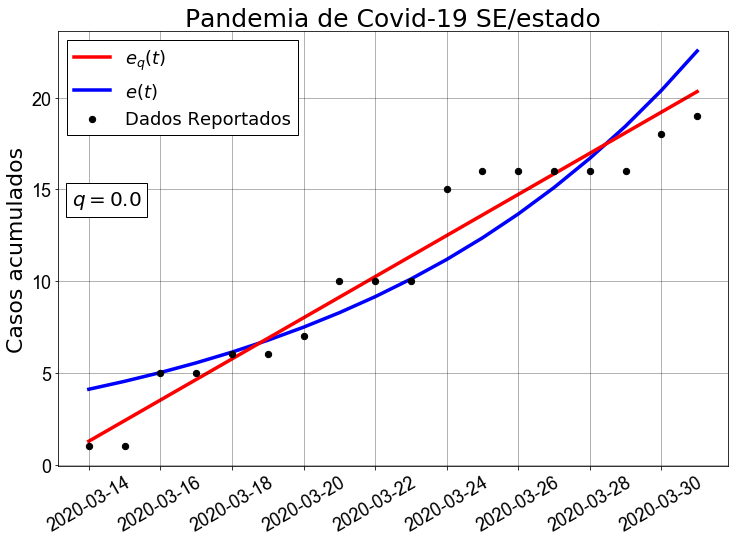

In [6]:
#Fitting the q-exp

miniq=[]
minit_0=[]
miniL=[]
miniA=[]
src=[]


#Define the state and the type of fit: (estado,capital,interior)
s='SE'
file='estado'

#Read csv
df=pd.read_csv('Data/'+s+"/"+file+".csv")

#Limit the date of the Fit
#pra mudar estado tem que mudar essa data
df = df.query("date <= '2020-03-31'")


#Read the file
dates=df.date.values
data=df.cases.values

#Run the minimizer
q,A,t_0,L=minim(data,75)       #qexp
A1,t_01,L1=mini(data,75)

miniq=[1,q]
minit_0=[t_0,t_01]
miniL=[L,L1]
miniA=[A,A1]
src=['BA']



#Create an x axixis for plotting the function.
t_x=np.arange(len(data))






#Plotting
#Create the figure and the graph.
fig, ax = pl.subplots(figsize=(12,8))

#Create a grid for visualization.
ax.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)

#Plot the points(Scatters). s=size, zorder= priority->(puttin g the points in at the front of everything).
ax.scatter(dates,data, s=40,color='black',zorder=3,label='Dados Reportados')

#Plot the fitted function as a line.
ax.plot(dates,q_exp(t_x,q,A,t_0,L),'r-', zorder=1,linewidth=3.5,label='$e_q(t)$')
ax.plot(dates,exp(t_x,A1,t_01,L1),'-',color='blue',zorder=0, linewidth=3.5,label='$e(t)$')





#Avons

#If you want to limit the Y axixis -> ax.set_ylim(0.,y_lim).

#set the legend box
ax.legend(loc='upper left',fontsize=18,fancybox=False, edgecolor='black',facecolor='w',framealpha=1)

#Set the annotation for the outputs
annotation_string = r"""$q = ${0}""".format(round(q,2), round(L,2),round(A,2),round(t_0,2))

pl.annotate(annotation_string, xy=(0.02, 0.6), xycoords='axes fraction',
                                             backgroundcolor='w',bbox=dict(boxstyle="Square",fc="w"), fontsize=20)
    


#Set the labels
ax.set_ylabel('Casos acumulados',fontsize=22)

#Set the title
ax.set_title('Pandemia de Covid-19 '+s+'/'+file,fontsize=25)

#The size of the numbers on the axixis
ax.tick_params(labelsize=18)

#Limiting the ammount of dates on the X axixs
ax.xaxis.set_major_locator(pl.MaxNLocator(10))
#Rotating the dates for better visualization
pl.setp(ax.get_xticklabels(), rotation=30)


#Setting the font of the numbers on the axixis as ARIAL 
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")  

#Show Graph       
pl.show()

#Save Fig
#fig.savefig(r"Fits\\"+s+file+"comparison.png",bbox_inches='tight')




In [24]:
miniq

[1, 0.7777390249359966]

achou 1
achou 2
achou 3
achou 4
achou 5


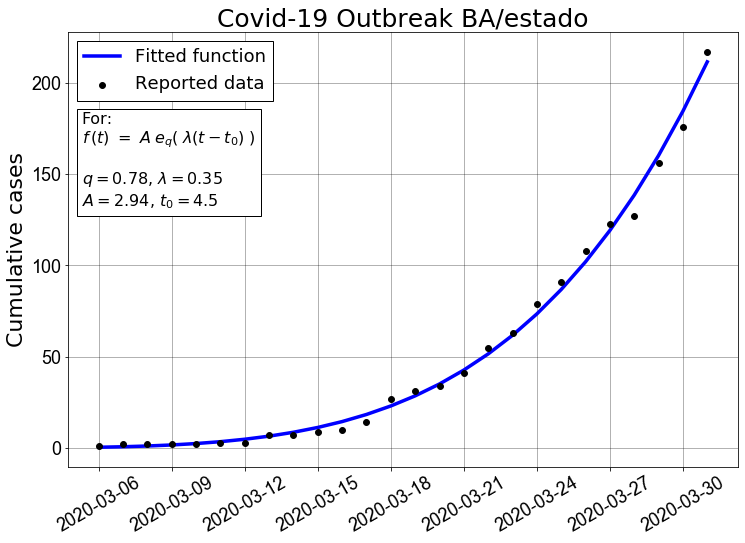

In [8]:
#Fitting the q-exp

#Define the state and the type of fit: (estado,capital,interior)
s='BA'
file='estado'

#Read csv
df=pd.read_csv('Data/'+s+"/"+file+".csv")

#Limit the date of the Fit
df = df.query("date <= '2020-03-31'")

#Read the file
dates=df.date.values
data=df.cases.values

#Run the minimizer
q,A,t_0,L=minim(data,75)

#Create an x axixis for plotting the function.
t_x=np.arange(len(data))






#Plotting
#Create the figure and the graph.
fig, ax = pl.subplots(figsize=(12,8))

#Create a grid for visualization.
ax.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)

#Plot the points(Scatters). s=size, zorder= priority->(puttin g the points in at the front of everything).
ax.scatter(dates,data, s=35,color='black',zorder=3,label='Reported data')

#Plot the fitted function as a line.
ax.plot(dates,q_exp(t_x,q,A,t_0,L),'b-', linewidth=3.5,label='Fitted function')





#Avons

#If you want to limit the Y axixis -> ax.set_ylim(0.,y_lim).

#set the legend box
ax.legend(loc='upper left',fontsize=18,fancybox=False, edgecolor='black',facecolor='w',framealpha=1)

#Set the annotation for the outputs
annotation_string = r"""For:
$f\,(t) \ = \ A \; e_q (\;{{\lambda (t-t_0)}}\;)$ 

$q = ${0}, $\lambda = ${1}
$A = ${2}, $t_0 = ${3}""".format(round(q,2), round(L,2),round(A,2),round(t_0,2))

pl.annotate(annotation_string, xy=(0.02, 0.6), xycoords='axes fraction',
                                             backgroundcolor='w',bbox=dict(boxstyle="Square",fc="w"), fontsize=16)
    


#Set the labels
ax.set_ylabel('Cumulative cases',fontsize=22)

#Set the title
ax.set_title('Covid-19 Outbreak '+s+'/'+file,fontsize=25)

#The size of the numbers on the axixis
ax.tick_params(labelsize=18)

#Limiting the ammount of dates on the X axixs
ax.xaxis.set_major_locator(pl.MaxNLocator(10))
#Rotating the dates for better visualization
pl.setp(ax.get_xticklabels(), rotation=30)


#Setting the font of the numbers on the axixis as ARIAL 
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")  

#Show Graph       
pl.show()

#Save Fig
fig.savefig(r"Fits\\"+s+file+".png",bbox_inches='tight')

